In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.fftpack import rfft
from scipy import signal
import os
import pywt

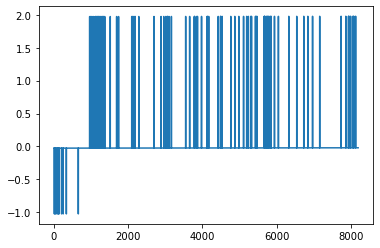

In [2]:
datapath = r"C:\Users\Aniket Tiwari\Desktop\books\grad\Embedded system prototyping\data-baseline"
path = os.path.join(datapath,"249","DATA.txt")
a = np.loadtxt(path)
plt.plot(a)

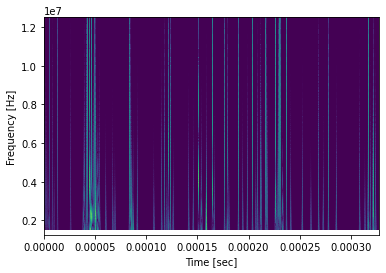

[[0.00282435 0.00237275 0.0014082  ... 0.00046561 0.00110807 0.00186707]
 [0.00279019 0.00205724 0.00110013 ... 0.00073875 0.00147088 0.00211596]
 [0.00262386 0.00173058 0.00084916 ... 0.00106223 0.00180417 0.00226341]
 ...
 [0.06576489 0.0734684  0.09877357 ... 0.006905   0.00695219 0.00697399]
 [0.0639486  0.09045376 0.07231788 ... 0.00684414 0.00693197 0.00697158]
 [0.06566229 0.07336239 0.07480003 ... 0.00688666 0.0069365  0.00698503]]


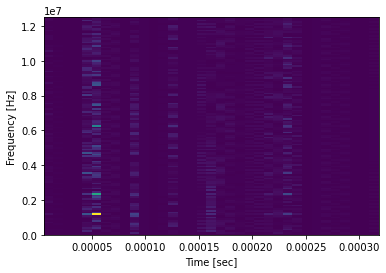

In [5]:
fs = 25000000
dt = float(1/fs)
frequencies = pywt.scale2frequency('cmor1.5-1.0', np.arange(2,20,0.05)) / dt
coef, f= pywt.cwt(a,np.arange(2,20,0.05),'cmor1.5-1.0')
tr = np.arange(len(a))*dt
coef = abs(coef)
plt.pcolormesh(tr, frequencies, coef)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
print(coef)
fr,tr,Sxxr = signal.spectrogram(a,fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.pcolormesh(tr, fr, Sxxr)

In [ ]:
datapath = r"C:\Users\Aniket Tiwari\Desktop\books\grad\Embedded system prototyping\pw-1024"
path = os.path.join(datapath,"249","DATA.txt")
a = np.loadtxt(path)
frequencies = pywt.scale2frequency('cmor1.5-1.0', np.arange(2,20,0.05)) / dt
coef, f= pywt.cwt(a,np.arange(2,20,0.05),'gaus1')
tr = np.arange(len(a))*dt
Sxxs = Sxxr
coefs= coef[:,:8190]
for i in range(250):
    path = os.path.join(datapath,str(i),"DATA.txt")
    a = np.loadtxt(path) 
    fr,tr,Sxxr = signal.spectrogram(a,fs)
    Sxxs = Sxxr + Sxxs
    coef, f= pywt.cwt(a,np.arange(2,20,0.05),'cmor1.5-1.0')
    coef = coef[:,:8190]
    coefs = coef + coefs
    coef= abs(coef)
    ts = (np.arange(8190))*dt
    frequency = f*25000000
    plt.pcolormesh(ts, frequency, coef)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    fig_name = os.path.join(datapath,str(i),"cwt.png")
    plt.savefig(fig_name)
    print(i)

Sxxs = Sxxs/250
coefs= coefs/250
coefs = abs(coefs)
ts = (np.arange(8190))*dt
frequency = f*25000000
plt.pcolormesh(ts, frequency, coefs)
plt.show()
plt.pcolormesh(tr, fr, Sxxs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
frequency = pywt.scale2frequency('cmor1.5-1.0', np.arange(2,30)) / dt
print (frequency)